In [1]:
import pandas as pd
import scanpy as sc

from scGIST import scGIST
from scGIST import test_classifier, get_priority_score_list

In [2]:
# path to the AnnData h5ad file
file_path = './data/head_neck/head_neck.h5ad'

In [3]:
# load the h5ad file
adata = sc.read_h5ad(file_path)

In [4]:
# column that contains the label of the cell types
label_column = 'non-cancer cell type'

In [5]:
n_genes = adata.X.shape[1]
n_classes = adata.obs[label_column].unique().size

In [6]:
panel_size = 60
gist = scGIST()
gist.create_model(n_genes, n_classes, panel_size=panel_size, alpha=0.2)
gist.compile_model()
gist.train_model(adata, label_column, verbose=0, epochs=200)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


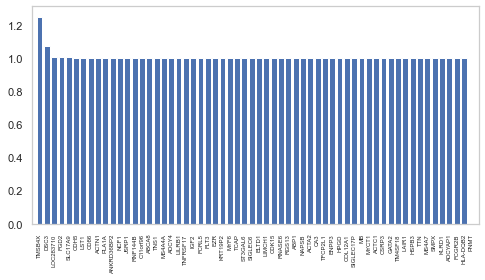

In [7]:
# get marker names and plot the marker weights
markers = gist.get_markers_names(adata, verbose=0, plot_weights=True)

In [8]:
# get accuracy and macro-f1 score of the markers using KNN
# first get the indices of the markers
markers_indices = gist.get_markers_indices()
accuracy, f1 = test_classifier(adata, label_column, markers=markers_indices)
print(f'Accuracy: {accuracy}, F1-score: {f1}')

Accuracy: 94.56398640996603, F1-score: 0.9236970450085603


Run the model with priority given to genes of interest

In [9]:
# Load the data and convert it to list using utility function
gene_priorities = pd.read_csv('./data/head_neck/gene_priorities.csv')
priority_scores = get_priority_score_list(adata, gene_priorities)

In [12]:
panel_size = 60
gist = scGIST()
gist.create_model(n_genes, n_classes, panel_size=panel_size, priority_scores=priority_scores, alpha=0.2)
gist.compile_model()
gist.train_model(adata, label_column, verbose=0, epochs=200)

In [13]:
markers_indices = gist.get_markers_indices()
accuracy, f1 = test_classifier(adata, label_column, markers=markers_indices)
print(f'Accuracy: {accuracy}, F1-score: {f1}')

Accuracy: 90.14722536806342, F1-score: 0.8682288854464917
